In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Plot region of interest for OVERCAST project

In [5]:
def plot_bbox(ax,bbox,linecolor='b',txt_label=None,npt=100,lw=2):
    '''
    Function to plot bounding box on the map
    
    Parameters:
    ax:        axes handle of the plot
    bbox:      bounding box of domain of interest, in the format of 
               [lon0, lat0, lon1, lat1], where (lon0,lat0) and (lon1,lat1)
               are the coordinate of the lower left and upper right corners
    linecolor: the line color for the bounding box, blue by default
    npt:       the number of points to use for box boundaries. 
    '''
    pcproj = ccrs.PlateCarree()
    xline = np.linspace(bbox[0],bbox[2],npt+1)
    yline = np.ones(npt+1)*bbox[1]
    ax.plot(xline,yline,'-',lw=lw,color=linecolor,transform=pcproj)

    xline = np.linspace(bbox[0],bbox[2],npt+1)
    yline = np.ones(npt+1)*bbox[3]
    ax.plot(xline,yline,'-',lw=lw,color=linecolor,transform=pcproj)

    xline = np.ones(npt+1)*bbox[0]
    yline = np.linspace(bbox[1],bbox[3],npt+1)
    ax.plot(xline,yline,'-',lw=lw,color=linecolor,transform=pcproj)

    xline = np.ones(npt+1)*bbox[2]
    yline = np.linspace(bbox[1],bbox[3],npt+1)
    ax.plot(xline,yline,'-',lw=lw,color=linecolor,transform=pcproj)
    
    if txt_label is not None:
        xm = (bbox[0]+bbox[2])/2.+2.
        ym = (bbox[1]+bbox[3])/2.+2.
        ax.text(xm,ym,txt_label,fontsize=18,transform=pcproj)
    return
    

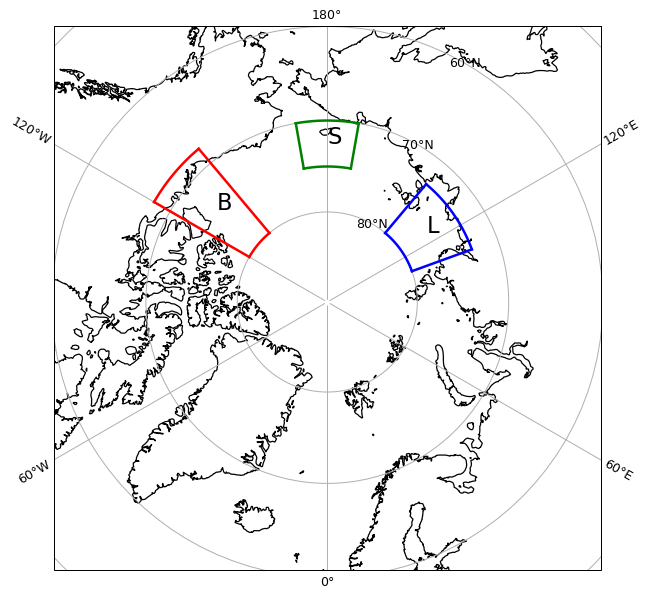

In [8]:

##    bbox:      bounding box of domain of interest, in the format of 
##               [lon0, lat0, lon1, lat1], where (lon0,lat0) and (lon1,lat1)
##               are the coordinate of the lower left and upper right corners
bbox_laptev   = [110,73,140,80]
bbox_beaufort = [-140,68,-120,80]
#bbox_saildrone = [-170,70,-150,75]
bbox_saildrone = [-170,64,-150,77]


plt.figure(figsize=(8,8), dpi= 90)
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0)) 
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
ax.gridlines(draw_labels=True)

plot_bbox(ax,bbox_laptev,linecolor='b',txt_label='L')
plot_bbox(ax,bbox_beaufort,linecolor='r',txt_label='B')
plot_bbox(ax,bbox_saildrone,linecolor='g',txt_label='S')



### Or, just run the script

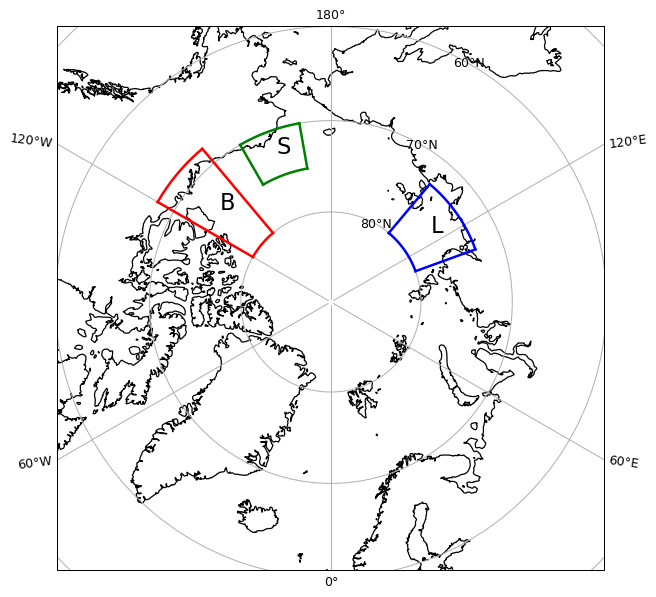

In [7]:
%run -i '../scripts/roi_plot.py'